In [ ]:
!pip install yfinance
''' We are using yahoo finance dataset because it has a lot of data'''

' We are using yahoo finance dataset because it has a lot of data'

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
#standard data manipulation libraries
from pandas_datareader import data as pdr
#useful for pulling data from yfinance
from sklearn import linear_model
import statsmodels.api as sm
import yfinance as yf

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
yf.Ticker("AAPL").history(start = "2023-01-01", end = "2023-01-04")


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,129.555841,130.17239,123.479803,124.374802,112117500,0.0,0.0


In [ ]:
ticker_list = 'TGT TSLA F GM  MSFT ETSY SPOT NVDA AMD META BABA PYPL NFLX SQ CRM XOM TEAM TWLO V UNH JPM SBUX ADBE BA NIO BAC PANW SNOW COP PDD CVX AVGO FIS EL MRNA QCOM WFC HD INTC OXY ENPH PFE INTU GS CAT NKE DIS TMUS TXN LLY MU CRWD MA NOW LRCX SHOP CVX AMGN JNJ CMCSA MCD DKNG SLB MRK TMO BILL CSCO ROKU HON HUM NET AMAT PG DHR T ADI CI MCHP SCHW PEP LMT WMT C WDAY VZ ACN BMY MRVL DDOG MNST EXP GM ILMN MRO KO IBM PNC ORCL ZS DOW ANET ADSK PLTR FSLR MAR AXP HAL CCL MDB FTNT UAL RTX BIDU VLO AAL UPS RCL HPQ PGR TJX LVS ADP CNC YUM GD OKTA PINS LULU DAL DPZ ATVI SNAP ZM EBAY AEP CL EA SNPS MGM MTCH WB TTWO PAYC LCID DOCU ZI BILI PLUG K COF SPLK CHWY PTON BURL LUV Z LYFT AKAM UBER'.split()
ticker_list = tuple(ticker_list)
#These are a list of stocks that we are looking at

In [ ]:
start = dt.date.today() - dt.timedelta(days = int(365.25*1.5))
mid = dt.date.today() - dt.timedelta(days = int(365.25*0.5))
end = dt.date.today()
#We are doing time series analysis, based on difference between start and end

In [ ]:
print(start, mid, end)

2022-05-13 2023-05-13 2023-11-11


In [ ]:
yf.__version__

'0.2.28'

In [ ]:
dataset = yf.download(list(ticker_list), start=start, end=mid)

[*********************100%%**********************]  157 of 157 completed


In [ ]:
data = dataset

In [ ]:
dataset = data['Adj Close']
"""the pdr get_data_yahoo function pulls yahoo finance data for all the stocks in ticker_list from start to mid.
the returned columns are Open, High, Low, Adj Close, Close, and Volume."""


stocks_returns = np.log(dataset/dataset.shift(1))
print(stocks_returns)

"""
This accounts for the inherent asymmetry that stocks can only go down 100% but can go up
unlimited amounts. In other words, it rescales [-100, infinity] to [-infinity, infinity]"""
corr_matrix = stocks_returns.corr()
print(corr_matrix)

"""
The .corr() function calculates the correlation between two time series
For this case, we'll take the pairwise correlations between every pair of
stocks and use the highest pairs as candidates for cointegration.
"""

                 AAL       ACN      ADBE       ADI       ADP      ADSK  \
Date                                                                     
2022-05-13       NaN       NaN       NaN       NaN       NaN       NaN   
2022-05-16 -0.001811 -0.002094 -0.006409 -0.008223 -0.000910 -0.023047   
2022-05-17  0.073935  0.016978  0.016714  0.039846  0.030033  0.015765   
2022-05-18 -0.053600 -0.059852 -0.029153 -0.024217 -0.030513 -0.039941   
2022-05-19 -0.008323 -0.002008 -0.008836  0.006358 -0.007945  0.030078   
...              ...       ...       ...       ...       ...       ...   
2023-05-08  0.034718 -0.003129 -0.012535  0.006143 -0.005631 -0.015249   
2023-05-09  0.007631 -0.005073 -0.004107 -0.026914 -0.002851  0.003847   
2023-05-10 -0.009025  0.020325  0.003990  0.010026  0.006299  0.018456   
2023-05-11 -0.019008  0.012492 -0.007118 -0.004641 -0.024482 -0.016538   
2023-05-12 -0.003560  0.017909 -0.018109 -0.000111  0.013868  0.006967   

                 AEP      AKAM      A

"\nThe .corr() function calculates the correlation between two time series\nFor this case, we'll take the pairwise correlations between every pair of\nstocks and use the highest pairs as candidates for cointegration.\n"

In [ ]:
processed_corr = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(bool))
#Set diagonal elements and lower triangular elements to nans
#Serves to remove duplicates and 1-correlations between an element and itself
s =  processed_corr.unstack()
#Reshapes the correlation matrix into a list of ((row, column), correlation value) pairs
so = s.sort_values(kind="quicksort", ascending = False)
#Sort the pairs by correlation value
display(so[:30])

LRCX  AMAT    0.930460
V     MA      0.908942
MCHP  ADI     0.904268
UAL   AAL     0.904104
SLB   HAL     0.900943
XOM   CVX     0.900838
MRO   COP     0.890209
DAL   AAL     0.889623
TMO   DHR     0.885431
RCL   CCL     0.882782
UAL   DAL     0.881278
XOM   COP     0.879722
CVX   COP     0.872491
TXN   MCHP    0.869877
MRO   HAL     0.868482
MCHP  AMAT    0.866026
XOM   MRO     0.865784
JPM   BAC     0.863339
TXN   ADI     0.860977
MRO   CVX     0.860418
GM    F       0.860400
WFC   BAC     0.858639
NVDA  AMD     0.853266
      MRVL    0.850502
PEP   KO      0.847235
XOM   HAL     0.845334
MRVL  MCHP    0.839156
TXN   AMAT    0.839048
MDB   DDOG    0.838412
HAL   COP     0.838387
dtype: float64

In [ ]:
soreverse = s.sort_values(kind="quicksort", ascending = True)
#Sort the pairs by correlation value
display(soreverse[:30])

WB    MRK    -0.129172
SNOW  MRK    -0.103890
WB    K      -0.102161
MRK   MDB    -0.099914
Z     K      -0.095736
SNOW  K      -0.084526
MRK   LYFT   -0.079631
PLTR  MRK    -0.079143
MRK   LCID   -0.077323
      DDOG   -0.072846
LYFT  AMGN   -0.065251
MRK   LVS    -0.063041
NET   MRK    -0.060464
SNAP  CL     -0.058771
OKTA  MRK    -0.057759
SHOP  MRK    -0.054660
LVS   K      -0.048002
UBER  MRK    -0.043648
LCID  CL     -0.040468
PDD   K      -0.039595
LYFT  LMT    -0.036775
WB    HUM    -0.036519
NIO   K      -0.035665
ZS    MRK    -0.033773
TWLO  MRK    -0.033413
PDD   BMY    -0.032927
MRK   DOCU   -0.032170
TSLA  MRK    -0.032090
TWLO  K      -0.031993
MDB   BMY    -0.029605
dtype: float64

Based on the Results, LRCX and AMAT have the highest correlation.

VISUALIZING DATA (for graphs)

In [ ]:
stocks = yf.download(['LRCX', 'AMAT'], start, mid)['Adj Close']
# Pull data for closes
stocks['LRCX_1d_return'] = np.log(stocks['LRCX']/stocks['LRCX'].shift(1))
stocks['AMAT_1d_return'] = np.log(stocks['AMAT']/stocks['AMAT'].shift(1))
# Calculate daily returns

[*********************100%%**********************]  2 of 2 completed


In [ ]:
print(stocks)

                  AMAT        LRCX  LRCX_1d_return  AMAT_1d_return
Date                                                              
2022-05-13  110.248856  482.015259             NaN             NaN
2022-05-16  108.888741  472.755493       -0.019397       -0.012414
2022-05-17  115.157127  501.955505        0.059933        0.055971
2022-05-18  109.736351  467.865997       -0.070330       -0.048217
2022-05-19  109.144981  462.623657       -0.011268       -0.005404
...                ...         ...             ...             ...
2023-05-08  115.202583  523.758789       -0.005622       -0.002675
2023-05-09  113.301613  512.802246       -0.021141       -0.016639
2023-05-10  114.864197  524.265869        0.022109        0.013697
2023-05-11  114.913948  524.444824        0.000341        0.000433
2023-05-12  115.540970  524.067017       -0.000721        0.005442

[251 rows x 4 columns]


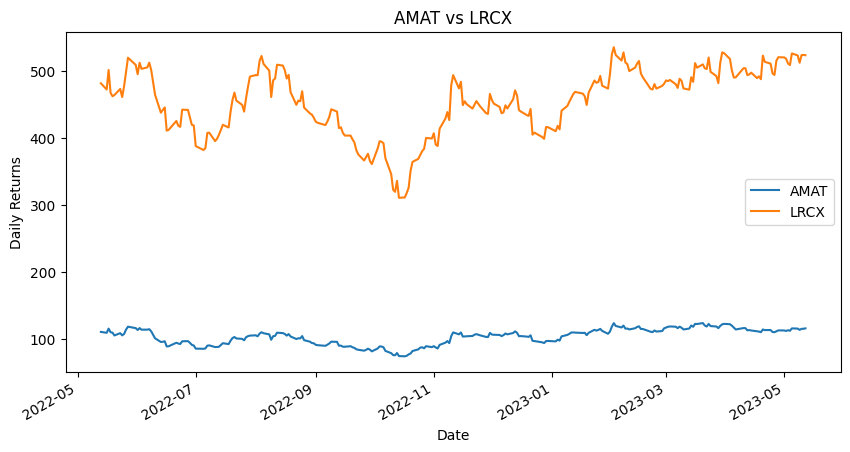

In [ ]:
stocks[['AMAT', 'LRCX']].plot(figsize=(10, 5))
plt.title('AMAT vs LRCX')
plt.ylabel('Daily Returns')
plt.show()

[*********************100%%**********************]  2 of 2 completed


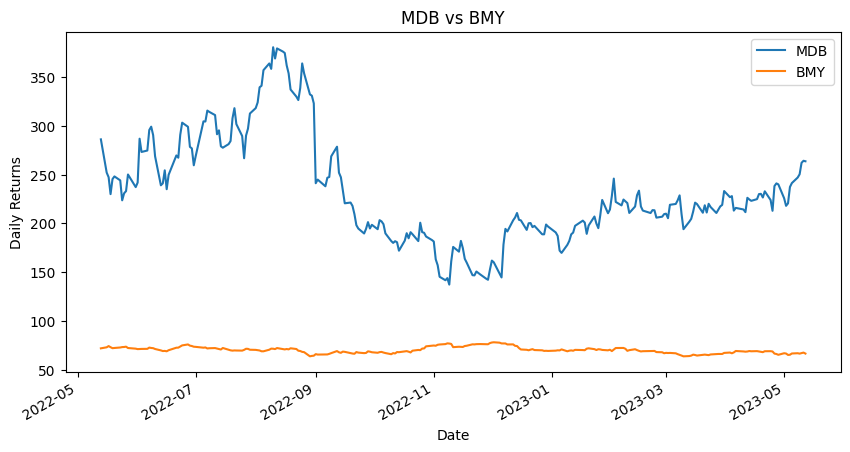

In [ ]:
stocks = yf.download(['MDB', 'BMY'], start, mid)['Adj Close']
# Pull data for closes
stocks['MDB_1d_return'] = np.log(stocks['MDB']/stocks['MDB'].shift(1))
stocks['BMY_1d_return'] = np.log(stocks['BMY']/stocks['BMY'].shift(1))
# Calculate daily returns

stocks[['MDB', 'BMY']].plot(figsize=(10, 5))
plt.title('MDB vs BMY')
plt.ylabel('Daily Returns')
plt.show()

In [ ]:
import numpy as np

stocks.dropna(inplace = True)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = stocks[['AMAT', 'LRCX']]
y = stocks[['LRCX_1d_return', 'AMAT_1d_return']]
model = LinearRegression()
model.fit(X, y)
print(model.coef)
predicted_Y = model.predict(X)
mse = mean_squared_error(y, predicted_Y)
print(f"Mean Squared Error: {mse}")

AttributeError: ignored

In [ ]:
thresh = 0.8
#hyperparameter
flag_buy = (((stocks['LRCX_1d_return']) / stocks['LRCX_1d_return'].std() - (stocks['AMAT_1d_return']) / stocks['AMAT_1d_return'].std()) > thresh).astype(int)
flag_sell = (((stocks['LRCX_1d_return']) / stocks['LRCX_1d_return'].std() - (stocks['AMAT_1d_return']) / stocks['AMAT_1d_return'].std()) < -thresh).astype(int)
# Integer flags for when to buy/sell AMAT -- buy when LRCX goes up >0.8 stdevs more than AMAT or LRCX goes down 0.8 stdevs more than AMAT
flag = flag_buy - flag_sell
profs = flag.shift() * stocks['AMAT_1d_return']
#Calculate daily profits as position * return

In [ ]:
flag

Date
2022-05-13    0
2022-05-16    0
2022-05-17    0
2022-05-18    0
2022-05-19    0
             ..
2023-05-08    0
2023-05-09    0
2023-05-10    0
2023-05-11    0
2023-05-12    0
Length: 251, dtype: int64

In [ ]:
profs.sum()

0.26166715749329683

In [ ]:
profs[profs!=0].mean() / (profs[profs!=0].std() * abs(flag).sum()**(-1/2))
#Filter to places where daily profit isn't 0 (so a trade was made) and do a t-test

4.163355415127164

<Axes: xlabel='Date'>

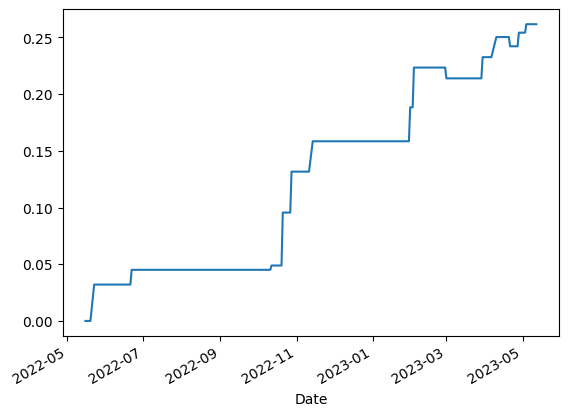

In [ ]:
profs.cumsum().plot()
#cumulative sum of returns over time == PNL

[*********************100%%**********************]  2 of 2 completed
0.26166709409966593
4.1633577819450736


<Axes: xlabel='Date'>

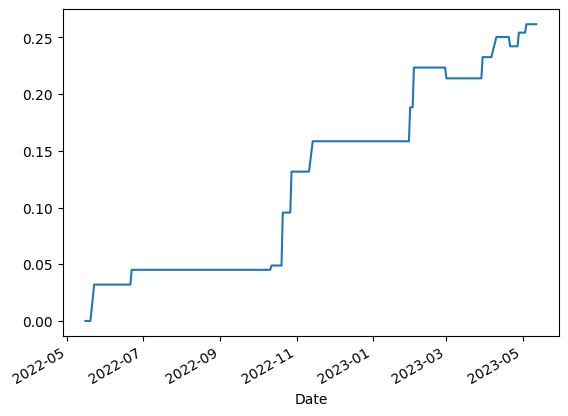

In [ ]:
stocks = yf.download(['LRCX', 'AMAT'], start, mid)['Adj Close']
# Pull data for closes
stocks['LRCX_1d_return'] = np.log(stocks['LRCX']/stocks['LRCX'].shift(1))
stocks['AMAT_1d_return'] = np.log(stocks['AMAT']/stocks['AMAT'].shift(1))
# Calculate daily returns
thresh =0.8
#hyperparameter
flag_buy = (((stocks['LRCX_1d_return']) / stocks['LRCX_1d_return'].std() - (stocks['AMAT_1d_return']) / stocks['AMAT_1d_return'].std()) > thresh).astype(int)
flag_sell = (((stocks['LRCX_1d_return']) / stocks['LRCX_1d_return'].std() - (stocks['AMAT_1d_return']) / stocks['AMAT_1d_return'].std()) < -thresh).astype(int)
# Integer flags for when to buy/sell AMAT -- buy when LRCX goes up >0.8 stdevs more than AMAT or LRCX goes down 0.8 stdevs more than AMAT
flag = flag_buy - flag_sell
profs = flag.shift() * stocks['AMAT_1d_return']
#Calculate daily profits as position * return
print(profs.sum())
#Sum of total returns -- pretty good
print(profs[profs!=0].mean() / (profs[profs!=0].std() * abs(flag).sum()**(-1/2)))
#Filter to places where daily profit isn't 0 (so a trade was made) and do a t-test
profs.cumsum().plot()
#cumulative sum of returns over time == PNL
#Still profitable, but much less impressive

In [ ]:
stocks = yf.download(['LRCX', 'AMAT'], start, mid)[['Adj Close', 'Open']]

"""
We'll try something that has a better chance of actually being a trade -- mean reversion
based on open/close prices. In the trade before, you always just get outcompeted by the
firm that trades fastest before 4. In this one, you reasonably have a chance to get your trade
"""

[*********************100%%**********************]  2 of 2 completed


"\nWe'll try something that has a better chance of actually being a trade -- mean reversion\nbased on open/close prices. In the trade before, you always just get outcompeted by the\nfirm that trades fastest before 4. In this one, you reasonably have a chance to get your trade\n"

In [ ]:
stocks

Adj Close                    Open            
                  AMAT        LRCX        AMAT        LRCX
Date                                                      
2022-05-13  110.248848  482.015198  108.190002  465.600006
2022-05-16  108.888741  472.755493  109.610001  486.420013
2022-05-17  115.157127  501.955505  114.540001  495.019989
2022-05-18  109.736343  467.865997  113.989998  500.519989
2022-05-19  109.144989  462.623749  111.410004  479.500000
...                ...         ...         ...         ...
2023-05-08  115.202583  523.758789  116.870003  530.000000
2023-05-09  113.301613  512.802246  114.080002  519.580017
2023-05-10  114.864197  524.265869  115.519997  524.119995
2023-05-11  114.913956  524.444824  115.300003  528.440002
2023-05-12  115.540970  524.066956  116.709999  530.000000

[251 rows x 4 columns]

10.477389624637249


'\nobviously this procedure has some error lol\nfind the bug! this is lowk a pandas q\n'

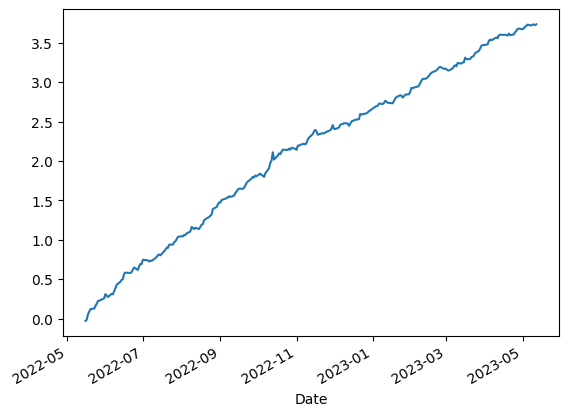

In [ ]:
flag_lrcx = -np.sign(np.log((stocks['Open']['LRCX'].shift() / stocks['Adj Close']['LRCX'])))
tot = flag_lrcx * np.log(stocks['Adj Close']['LRCX'] / stocks['Open']['LRCX'])
print(tot.mean() / (tot.std() * (len(tot)**(-1/2))))
tot.cumsum().plot()
"""
obviously this procedure has some error lol
find the bug! this is lowk a pandas q
"""

In [ ]:
lrcx_gaps = np.log((stocks['Open']['LRCX'] / stocks['Adj Close']['LRCX'].shift()))
amat_gaps = np.log((stocks['Open']['AMAT'] / stocks['Adj Close']['AMAT'].shift()))
#Calculate "gap" -- change from yesterday's close to today's open
flag = np.sign((lrcx_gaps / lrcx_gaps.std()) - (amat_gaps / amat_gaps.std()) )
#Flag -- increase / decrease
profs = flag * np.log(stocks['Adj Close']['AMAT'] / stocks['Open']['AMAT'])

In [ ]:
(profs.mean() / (profs.std() * len(profs)**(-1/2)))

-2.1041264468679466

<Axes: xlabel='Date'>

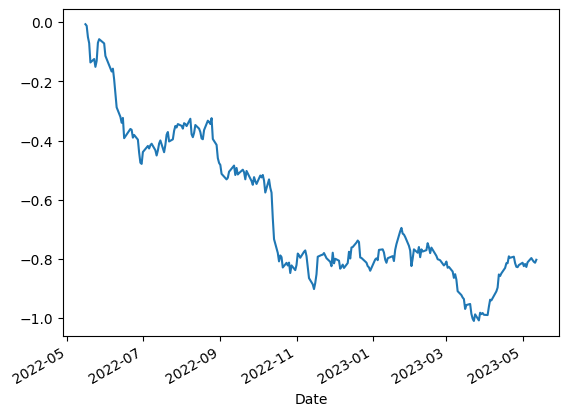

In [ ]:
profs.cumsum().plot()
#this looks really ass

In [ ]:
profs_lrcx = -flag * np.log(stocks['Adj Close']['LRCX'] / stocks['Open']['LRCX'])
print(profs_lrcx.mean()* len(profs_lrcx)**(0.5) / profs_lrcx.std())

4.506302941099422


<Axes: xlabel='Date'>

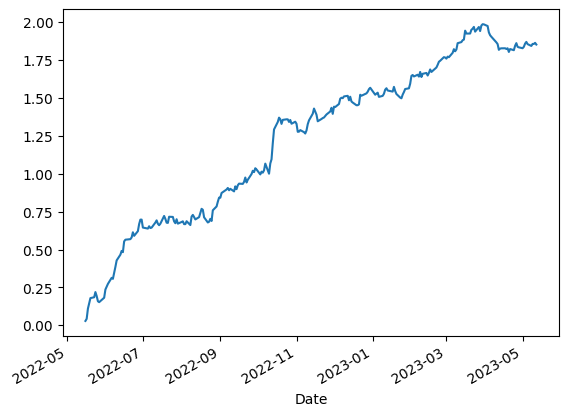

In [ ]:
profs_lrcx.cumsum().plot()
#pretty good...

In [ ]:
profs = flag * np.log(stocks['Adj Close']['AMAT'] / stocks['Open']['AMAT']) - flag * np.log(stocks['Adj Close']['LRCX'] / stocks['Open']['LRCX'])
print(profs.mean()* len(profs)**(0.5) / profs.std())

6.259311773297821


<Axes: xlabel='Date'>

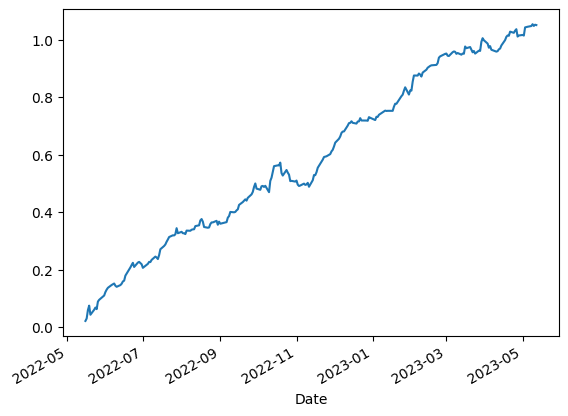

In [ ]:
profs.cumsum().plot()
#up and to the right!!! how do we get a higher t-stat by combining a "good" strategy with a "bad" strategy?

[*********************100%%**********************]  2 of 2 completed
1.8336165594682914


<Axes: xlabel='Date'>

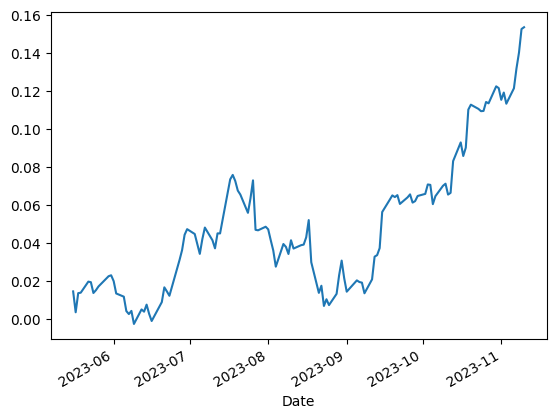

In [ ]:
stocks = yf.download(['LRCX', 'AMAT'], mid, end)[['Close', 'Open']]
lrcx_gaps = np.log((stocks['Open']['LRCX'] / stocks['Close']['LRCX'].shift()))
amat_gaps = np.log((stocks['Open']['AMAT'] / stocks['Close']['AMAT'].shift()))
flag = np.sign((lrcx_gaps / lrcx_gaps.std()) - (amat_gaps / amat_gaps.std()) )
profs = flag * np.log(stocks['Close']['AMAT'] / stocks['Open']['AMAT']) - flag * np.log(stocks['Close']['LRCX'] / stocks['Open']['LRCX'])
print(profs.mean()* len(profs)**(0.5) / profs.std())
profs.cumsum().plot()